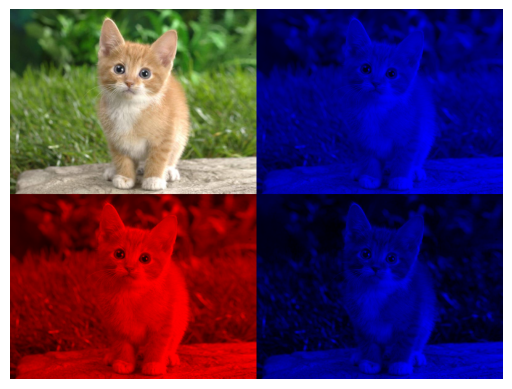

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Resmi yükle
image = cv2.imread('/content/cat1.jpg')

# Orijinal resmi %50 boyutunda küçült
resized_image = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)

# Küçültülmüş resmi farklı renk uzaylarına dönüştür
hsv_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2HSV)  # HSV'ye çevir
lab_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2Lab)  # Lab'a çevir

### Maskelenmiş görüntüleri oluştur ve renk tonlarını ekle

# 1. Orijinal (Sol Üst) - Sadece küçültülmüş orijinal resmi göster
original_image = resized_image.copy()

# 2. HSV Maskesi - V (Value) kanalını göster, mavi ton ekle
hsv_masked = np.zeros_like(resized_image)  # Boş bir maske oluştur
hsv_masked[:, :, 2] = hsv_image[:, :, 2]  # V (Parlaklık) kanalını al
hsv_masked[:, :, 0] = 255  # Mavi ton eklemek için Blue kanalını artır
# Maskelenmiş HSV'yi BGR olarak birleştir
hsv_masked_bgr = cv2.merge([np.zeros_like(hsv_masked[:, :, 0]), np.zeros_like(hsv_masked[:, :, 0]), hsv_masked[:, :, 2]])

# 3. Lab Maskesi - L (Lightness) kanalını göster, kırmızı ton ekle
lab_masked = np.zeros_like(resized_image)  # Boş bir maske oluştur
lab_masked[:, :, 0] = lab_image[:, :, 0]  # L (Parlaklık) kanalını al
# Maskelenmiş Lab'ı BGR olarak kırmızı ton ekleyerek birleştir
lab_masked_bgr = cv2.merge([lab_masked[:, :, 0], np.zeros_like(lab_masked[:, :, 0]), np.zeros_like(lab_masked[:, :, 0])])

# 4. RGB'deki Mavi Kanal (Sağ Alt) - Sadece Mavi kanalı göster
rgb_masked = np.zeros_like(resized_image)  # Boş bir maske oluştur
rgb_masked[:, :, 0] = resized_image[:, :, 0]  # Sadece Mavi kanalını al

### Görüntüleri birleştir

# Üst sırayı birleştir:
top_row = np.hstack((original_image,lab_masked_bgr ))

# Alt sırayı birleştir:
bottom_row = np.hstack((hsv_masked_bgr , rgb_masked))

# İki sırayı birleştir ve son görüntüyü oluştur
final_image = np.vstack((top_row, bottom_row))

# Son görüntüyü göster
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))  # Görüntüyü BGR'den RGB'ye çevirip göster
plt.axis('off')  # Eksenleri kapat
plt.show()  # Görüntüyü göster


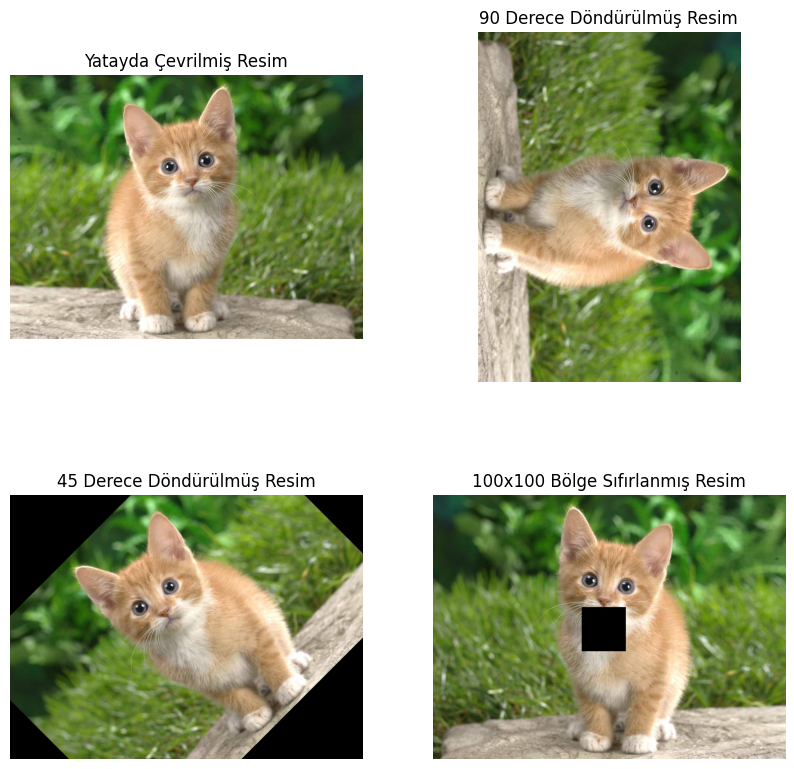

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Resmi yükle
image = cv2.imread('/content/cat1.jpg')

### 1. Resmi yatayda çevirme
flipped_image = cv2.flip(image, 1)  # 1 -> Yatayda çevirir

### 2. Resmi 90 derece döndürme
rotated_90_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

### 3. Resmi 45 derece döndürme (Affine Transformation ile yapılır)
(h, w) = image.shape[:2]  # Resmin yüksekliği ve genişliği
center = (w // 2, h // 2)  # Dönüş merkezi resmin ortası
M = cv2.getRotationMatrix2D(center, 45, 1.0)  # 45 derece döndürme matrisi
rotated_45_image = cv2.warpAffine(image, M, (w, h))

### 4. Rastgele bir 100x100 bölgesini sıfır yapma
image_with_zeros = image.copy()  # Orijinal resmi kopyala
# 100x100'luk bölgenin başlangıç koordinatlarını rastgele seç
random_x = np.random.randint(0, w - 100)
random_y = np.random.randint(0, h - 100)
# Bu bölgeyi sıfırla (siyah yap)
image_with_zeros[random_y:random_y+100, random_x:random_x+100] = 0

### Sonuçları gösterme
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(cv2.cvtColor(flipped_image, cv2.COLOR_BGR2RGB))
ax[0, 0].set_title('Yatayda Çevrilmiş Resim')
ax[0, 0].axis('off')

ax[0, 1].imshow(cv2.cvtColor(rotated_90_image, cv2.COLOR_BGR2RGB))
ax[0, 1].set_title('90 Derece Döndürülmüş Resim')
ax[0, 1].axis('off')

ax[1, 0].imshow(cv2.cvtColor(rotated_45_image, cv2.COLOR_BGR2RGB))
ax[1, 0].set_title('45 Derece Döndürülmüş Resim')
ax[1, 0].axis('off')

ax[1, 1].imshow(cv2.cvtColor(image_with_zeros, cv2.COLOR_BGR2RGB))
ax[1, 1].set_title('100x100 Bölge Sıfırlanmış Resim')
ax[1, 1].axis('off')

plt.show()


Number of blue 'X' shapes: 26


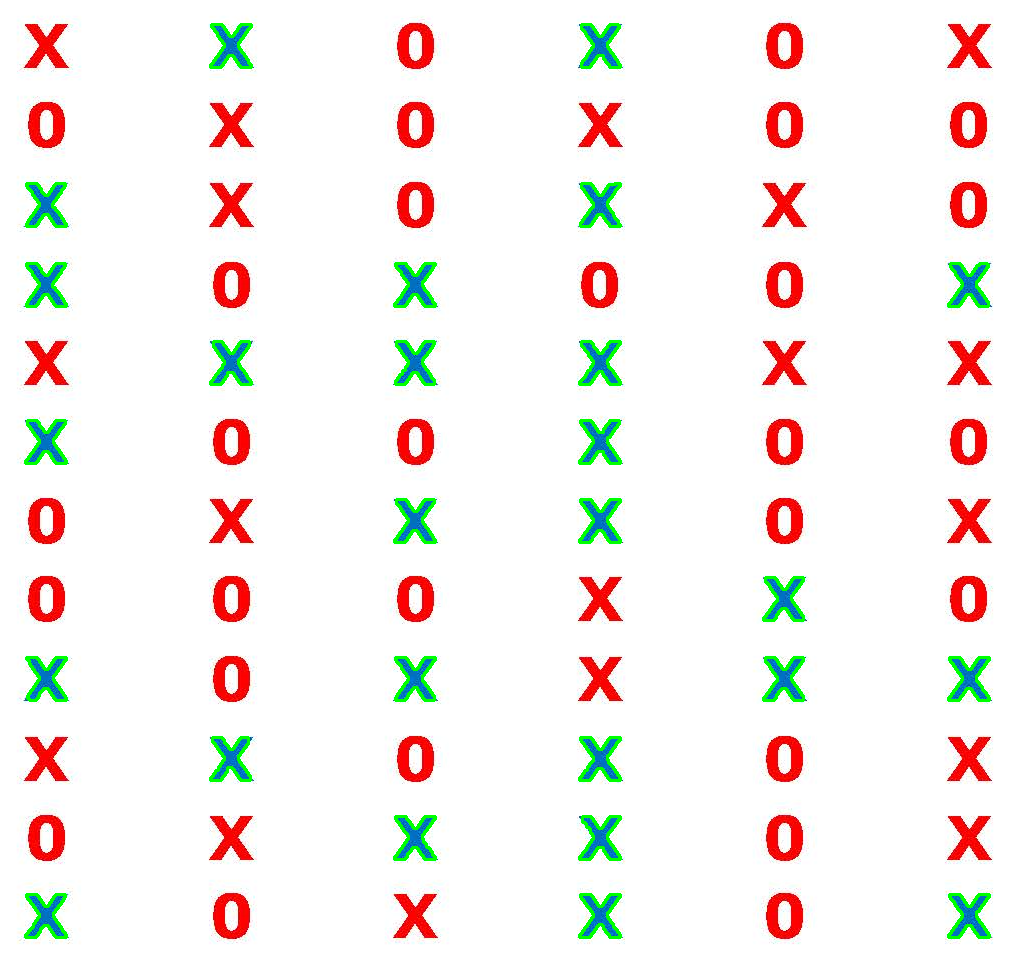

In [18]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Colab için özel gösterim fonksiyonu

# Resmi yükle
image = cv2.imread('/content/red_x.png')

# Adım 1: Resmi HSV renk uzayına dönüştür
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Adım 2: Mavi renk aralığını tanımla (HSV renk uzayında)
lower_blue = np.array([100, 150, 50])
upper_blue = np.array([140, 255, 255])

# Adım 3: Mavi renklerin beyaz, geri kalanların siyah olduğu bir maske oluştur
mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Adım 4: Morfolojik işlemlerle maskeyi temizle
kernel = np.ones((3, 3), np.uint8)
mask_cleaned = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # Boşlukları doldur
mask_cleaned = cv2.morphologyEx(mask_cleaned, cv2.MORPH_OPEN, kernel)  # Gürültüleri temizle

# Adım 5: Maskelenmiş alanda konturları bul
contours, _ = cv2.findContours(mask_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Adım 6: Geçerli mavi 'X' şekillerini filtrele ve say
x_count = 0
for contour in contours:
    # Alan filtresi ile 'X' şekillerini seç
    area = cv2.contourArea(contour)
    if 100 < area < 1000:  # Bu eşikleri resme göre ayarlamalıyız
        x_count += 1

# Mavi 'X' şekillerinin sayısını yazdır
print(f"Number of blue 'X' shapes: {x_count}")

# İsteğe bağlı: Tespit edilen X şekillerinin etrafına kontur çiz
output_image = image.copy()
cv2.drawContours(output_image, contours, -1, (0, 255, 0), 2)  # Yeşil konturlar

# Sonucu göster (cv2.imshow yerine cv2_imshow kullanıyoruz)
cv2_imshow(output_image)
